<a href="https://colab.research.google.com/github/GhosthoundMX30/Codigos-SNEDP/blob/main/MetodosBasicosSolEDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Métodos numéricos para la solución de (problema de valor inicial) PVI.

El problema de valor inicial toma la forma:

$$
u'(t) = f(u(t),t)\quad \text{para }t>t_0
$$

con la condición inicial

$$
u(t_{0}) = \eta.
$$

Con frecuencia se supone por simplicidad que $t_{0} = 0$.

### Algunos métodos numéricos básicos.

Tenemos las condiciones iniciales

$$
U^{0} = \eta
$$

y queremos calcular las aproximaciones $U^{1}$, $U^{2}$, $\ldots$, de tal manera que

$$
U^{n}\approx u(t_{n}).
$$

In [1]:
# Modulos
import numpy as np
import sympy as sp
from scipy.optimize import fsolve

def f_conv(f_str,var = 'x',tipo = 'numpy'):
    '''Regresa una función lambda que representa una función matemática f(x).
    
    * Entrada
        * f_str (str): Cadena con la expresión de una función.
        * var (str): Varible independiente.
        * tipo (str): Compatibilidad. Ver documentación de lambdify en sympy.        
    * Salida
        * (function): Función de python.        
    * Dependencias
        * sympy (module).
    '''
    return sp.lambdify(sp.symbols(var),sp.sympify(f_str),tipo)

#### Método de Euler (forward Euler)

El **método de Euler** está dado por:

$$
\dfrac{U^{n+1}-U^{n}}{k} = f(U^{n})
$$

o 

$$
U^{n+1} = U^{n} + kf(U^{n}).
$$


In [2]:
def forwardEuler(f,t0,U0,k = 0.1,M = 10):
    """Implementa el método de Euler para resolver la EDO de primer orden 
    u'(t) = f(u(t),t) con condición inicial u(t0) = U0. 
    
    * Entrada
        * f (function): Lado derecho de la ecuación. f = f(u(t),t).
        * t0 (float): Tiempo inicial.
        * U0 (float): Condición inicial. U0 = u(t0).
        * k (float): Tamaño de paso de tiempo.
        * M (int): Número de iteraciones
    * Salida
        * (ndarray): Valores para el tiempo t_i.
        * (ndarray): Aproximaciones de de la solución al tiempo t_i.
    * Dependencias
        * numpy (module).
    """
    U,t = [U0],[t0]
    for i in range(M):
        t.append(t[i] + k)
        U.append(U[i] + k*f(U[i],t[i]))
    return np.array(t,float),np.array(U,float)

#### Método de Euler hacia atrás (backward Euler)

El método de **Euler hacia atrás**,

$$
\dfrac{U^{n+1} - U^{n}}{k} = f(U^{n+1})
$$

o

$$
U^{n+1} = U^{n} + kf(U^{n+1})
$$

In [3]:
def backwardEuler(f,t0,U0,k = 0.1,M = 10):
    """Implementa el método de Euler hacia atrás para resolver la EDO de primer
    orden u'(t) = f(u(t),t) con condición inicial u(t0) = U0. 
    
    * Entrada
        * f (function): Lado derecho de la ecuación. f = f(u(t),t).
        * t0 (float): Tiempo inicial.
        * U0 (float): Condición inicial. U0 = U(t0).
        * k (float): Tamaño de paso de tiempo.
        * M (int): Número de iteraciones
    * Salida
        * (ndarray): Valores para el tiempo t_i.
        * (ndarray): Aproximaciones de de la solución al tiempo t_i.
    * Dependencias
        * numpy (module),  fsolve(function - module:scipy.optimize).
    """
    U,t = [U0],[t0]
    for i in range(M):
        t.append(t[i] + k) 
        U.append(fsolve(lambda u : u - U[i] - k*f(u,t[i+1]),U0)[0])
    return np.array(t,float),np.array(U,float)

#### Método de trapezoidal (trapezoidal method)

El **método trapezoidal** está dado por:

$$
\dfrac{U^{n+1} - U^{n}}{k} = \dfrac{1}{2}(f(U^{n+1}) + f(U^{n}))
$$

o

$$
U^{n+1} = U^{n} + \dfrac{k}{2}(f(U^{n+1}) + f(U^{n}))
$$

In [4]:
def trapezoidal(f,t0,U0,k = 0.1,M = 10):
    """Implementa el método trapezoidal para resolver la EDO de primer orden 
    u'(t) = f(u(t),t) con condición inicial u(t0) = U0. 
    
    * Entrada
        * f (function): Lado derecho de la ecuación. f = f(u(t),t).
        * t0 (float): Tiempo inicial.
        * U0 (float): Condición inicial. U0 = U(t0).
        * k (float): Tamaño de paso de tiempo.
        * M (int): Número de iteraciones
    * Salida
        * (ndarray): Valores para el tiempo t_i.
        * (ndarray): Aproximaciones de de la solución al tiempo t_i.
    * Dependencias
        * numpy (module), fsolve(function - module:scipy.optimize).
    """
    U,t = [U0],[t0]
    for i in range(M):
        t.append(t[i] + k) 
        U.append(fsolve(lambda u : u - U[i] - k/2.*(f(U[i],t[i]) + f(u,t[i+1])),
                        U0)[0])
    return np.array(t,float),np.array(U,float)

#### Método del punto medio (midpoint method)

El **método del punto medio** (o *método Leapfrog*) está dado por:

$$
\dfrac{U^{n+1} - U^{n-1}}{2k} = f(U^{n})
$$

o

$$
U^{n+1} = U^{n-1} + 2kf(U^{n})
$$

In [5]:


def midpoint(f,t0,U0,k = 0.1,M = 10):
    """Implementa el método del punto medio para resolver la EDO de primer orden 
    u'(t) = f(u(t),t) con condición inicial u(t0) = U0. 
    
    * Entrada
        * f (function): Lado derecho de la ecuación. f = f(u(t),t).
        * t0 (float): Tiempo inicial.
        * U0 (float): Condición inicial. U0 = u(t0).
        * k (float): Tamaño de paso de tiempo.
        * M (int): Número de iteraciones
    * Salida
        * (ndarray): Valores para el tiempo t_i.
        * (ndarray): Aproximaciones de de la solución al tiempo t_i.
    * Dependencias
        * numpy (module), trapezoidal(function).
    """
    t0,U0,k = [float(x) for x in [t0,U0,k]]
    U,t = [U0,trapezoidal(f,t0,U0,k,1)[-1][-1]],[t0,t0+k]
    for i in range(1,M):
        t.append(t[i] + k)
        U.append(U[i-1] + 2.*k*f(U[i],t[i]))
    return np.array(t,float),np.array(U,float)

#### Ejemplo

Consideramos el siguiente PVI

$$
	u'(t) = \dfrac{2}{t}u(t) + t^{2}e^{t}
$$

con la condición inicial

$$
  u(1) = 0
$$

Cuya solución exacta está dada por:

$$
u(t) = t^{2}(e^{t} - e).
$$

Analizamos el comportamiento de los diferentes métodos para resolver este problema.

╒═════╤═══════╤═════════════════╤═══════════════════╤════════════════════╤══════════════════╤══════════════════╕
│     │       │   <Sol. exacta> │   <Forward Euler> │   <Backward Euler> │    <Trapezoidal> │    <Punto medio> │
│   i │   t_i │          u(t_i) │    |u(t_i) - U^i| │     |u(t_i) - U^i| │   |u(t_i) - U^i| │   |u(t_i) - U^i| │
╞═════╪═══════╪═════════════════╪═══════════════════╪════════════════════╪══════════════════╪══════════════════╡
│   0 │  1    │        0        │      0.000000e+00 │       0.000000e+00 │     0.000000e+00 │     0.000000e+00 │
├─────┼───────┼─────────────────┼───────────────────┼────────────────────┼──────────────────┼──────────────────┤
│   1 │  1.05 │        0.153655 │      1.774055e-02 │       2.045527e-02 │     4.024656e-04 │     4.024656e-04 │
├─────┼───────┼─────────────────┼───────────────────┼────────────────────┼──────────────────┼──────────────────┤
│   2 │  1.1  │        0.34592  │      3.953357e-02 │       4.552828e-02 │     8.768000e-04 │   

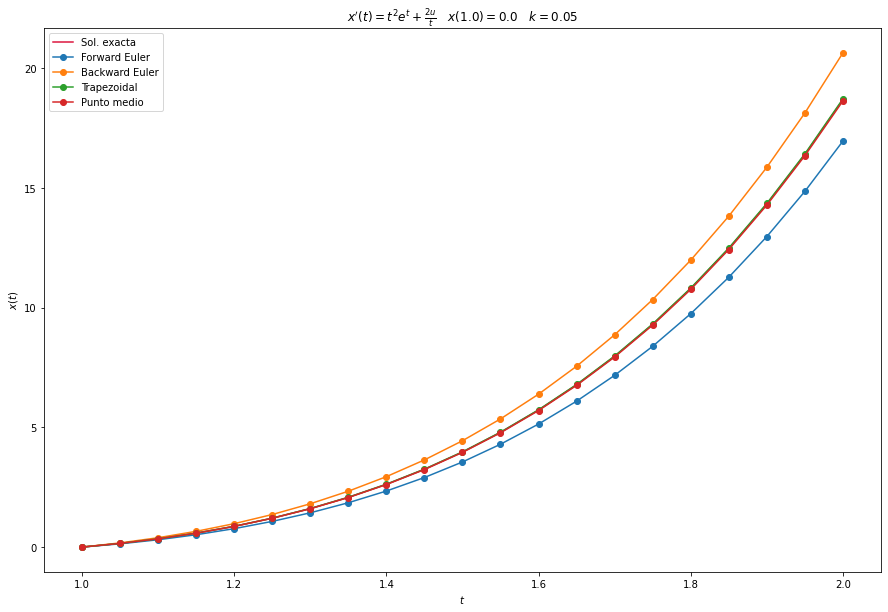

In [6]:
from tabulate import tabulate
import matplotlib.pyplot as plt

#Datos
f_str = '2/t*u + t**2*exp(t)'
f = f_conv(f_str,('u t'))
u_exct = f_conv('t**2*(exp(t) - exp(1))',('t'))
t0 = 1.
U0 = 0.
k = 0.05
M = 20
fmt = 'fancy_grid'

metodos = {'Forward Euler':forwardEuler,
           'Backward Euler':backwardEuler,
           'Trapezoidal':trapezoidal,
           'Punto medio':midpoint}

#Resultados
T = np.empty((M+1,len(metodos) + 3),float)
T[:,0] = np.arange(M+1)
T[:,1] = np.arange(t0,t0 + (M+1)*k,k)
T[:,2] = u_exct(T[:,1])

#Gráfica de la solución exacta
fig = plt.figure(figsize=(15,10))
plt.plot(T[:,1],T[:,2],label = 'Sol. exacta',color = 'crimson')

hdr = ['\ni','\nt_i','<Sol. exacta>\nu(t_i)']
fmtTabla = ['g','g','.6g']

#Calculamos las soluciones y creamos sus gráficas
i = 3
for met in metodos.keys():
  sol = metodos[met](f,t0,U0,k,M)[1]
  T[:,i] = np.fabs(T[:,2] - sol)
  hdr.append(f'<{met}>\n|u(t_i) - U^i|')
  fmtTabla.append('.6e')
  plt.plot(T[:,1],sol,'-o',label = met)
  i += 1  

# Imprimimos la tabla de resultados con los errores
print(tabulate(T, headers=hdr,tablefmt=fmt, floatfmt = fmtTabla))

#Grafica de comparación
ax = plt.gca()
ax.set_xlabel('$t$')
ax.set_ylabel('$x(t)$')
s = sp.latex(sp.sympify(f_str))
ax.set_title("$x'(t) = " + s + f"\quad x({t0}) = {U0}\quad k={k}$")
ax.legend()
plt.show()